In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import random
import scipy as sp
# from Logistic_Class import Logistic

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import random
import scipy as sp


class Logistic:
    def __init__(self, epsilon = 0.5, t_0 = int(0), T = int(100), a = 2.5,
                     x0 = 1.3, tau_zero = int(1), n_nodes = None, graph = None):
        '''
        PARAMETERS:
        epsilon: float
        t_0: float
        T:float
           Total time of simulated activity
        n_nodes: int
            Number of logistic maps
        x0: float
            Initial state of the logistic map
        tau_zero: int
            Delay parameter
        graph: networkx graph
        '''
        if n_nodes is None:
            raise ValueError("n_nodes must be specified")
        else:
            self.n_nodes = n_nodes
        self.epsilon = epsilon
        self.t_0 = t_0
        self.T = T
        self.x0 = [x0]
        self.tau_zero = tau_zero
        self.a = a
        if graph is None:
            raise ValueError("graph must be specified")
        else:
            self.G = graph
        
    def logistic(self, x):
        return x*self.a*(1-x)
    
    def adjacency_matrix(self):
        self.M = nx.to_numpy_array(self.G)
        return self.M
    
    def calculate_b(self,index):
        return np.sum(self.M[index])
    
    def Tau_matrix(self):
        self.tau_matrix = []
        c = 2
        for i in range(0,self.n_nodes):
            tau = []
            for j in range(0,self.n_nodes):
                tau.append(int(self.tau_zero + c*np.random.uniform(0,1)))
            self.tau_matrix.append(tau)
        return self.tau_matrix
    
    def interation(self):
        self.M = self.adjacency_matrix()
        self.tau_matrix = self.Tau_matrix()
        self.mapas = {}
        tau_max = max(max(self.tau_matrix))
        for i in range(0,self.n_nodes):
            self.mapas[i] = [(np.random.uniform(0,1))] #Definindo os valores iniciais dos mapas    
        for t in range(1,self.T): #Percorre nos intervalos de tempo
            if t>=tau_max:
                for i in range(0,self.n_nodes): #Percorre em todos os nós
                    x_T = (1-self.epsilon)*self.logistic(self.mapas[i][t-1])
                    soma = []
                    for j in range(0,self.n_nodes): #Calcula o somatorio pra cada um dos nós
                        tau = self.tau_matrix[i][j]
                        soma.append((self.epsilon/self.calculate_b(i))*self.M[i][j]*
                                    self.logistic(self.mapas[j][t-tau])) 
                    x_T = x_T + np.sum(soma)
                    self.mapas[i].append(x_T)
                    
            else: 
                for i in range(0,self.n_nodes): #Percorre em todos os nós
                    x_T = self.logistic(self.mapas[i][t-1])
                    soma = []
                    for j in range(0,self.n_nodes): #Calcula o somatorio pra cada um dos nós
                        tau = self.tau_matrix[i][j]
                        soma.append(0) 
                    x_T = x_T + np.sum(soma)
                    self.mapas[i].append(x_T)
        
        return self.mapas
        
    def run(self):
        return self.interation()
    
    def Sigma(self):
        space_mean = []
        for i in range(self.n_nodes): #Calculando a media espacial 
            space_mean.append(self.mapas[i][self.T-1])
        space_mean = np.mean(space_mean)
        sigma = []
        for i in range(n_nodes): #Somatorio 
            k = (self.mapas[i][self.T-1]-space_mean)**2
            sigma.append(k)
        sigma = sum(sigma)
        return (1/self.n_nodes)*(sigma/self.T) #Retorna a média temporal do somatorio divido por n_nodes
    
    def Sigma_line(self):
        sigma_line = []
        for i in range(n_nodes):
            k = (self.mapas[i][self.T-1]- self.mapas[i][0])**2
            sigma_line.append(k)
        sigma_line = sum(sigma_line)
        return (1/self.n_nodes)*(sigma_line/self.T)
    
    
    def TESTE_cu(self):
        av = []
        for i in range(0,self.n_nodes):
            av.append(np.mean(self.mapas[i]))
        cu = []
        for j in range(0,self.n_nodes):
            cuzin = []
            for i in range(0,self.T):
                cuzin.append((self.mapas[j][i]-av[j])**2)
            cu.append(np.mean(cuzin))
        tes = []
        for i in range(0,len(cu)):
            tes.append(cu[i]/self.n_nodes)
        return sum(tes)

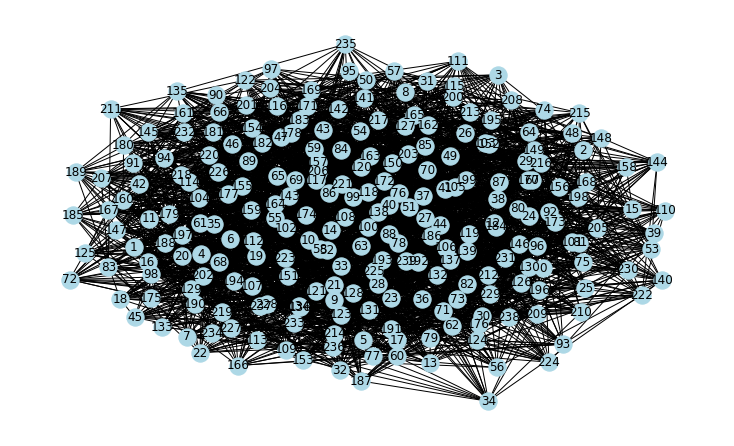

In [4]:
N = 240
tau1 = 3
tau2 = 1.5
mu = 0.7
k = 20
minc = 30
maxc = 30
G = nx.LFR_benchmark_graph(n = N, tau1 = tau1, tau2 = tau2, mu = mu, min_degree = k, 
                        max_degree = k, min_community=minc, max_community = maxc, seed = 10)
G.remove_edges_from(nx.selfloop_edges(G))
pos=nx.spring_layout(G)
fig= plt.figure(figsize=(10,6))
nx.draw(G, pos=pos, node_color = 'lightblue', with_labels = True)
plt.show()

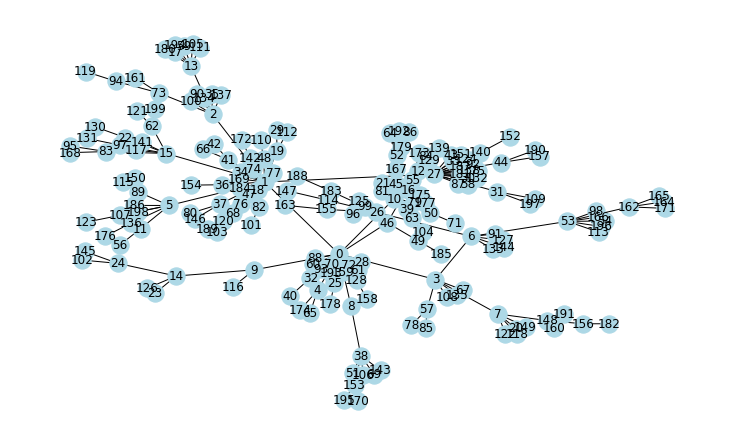

In [14]:
n_nodes = 200
av_degree = 2
m = int(av_degree/2) 
G = nx.barabasi_albert_graph(n_nodes,m) 
pos=nx.spring_layout(G)
fig= plt.figure(figsize=(10,6))
nx.draw(G, pos=pos, node_color = 'lightblue', with_labels = True)
plt.show()

In [15]:
nx.degree_assortativity_coefficient(G)

-0.23415350227739445

Assortativity: -0.021092141030437512


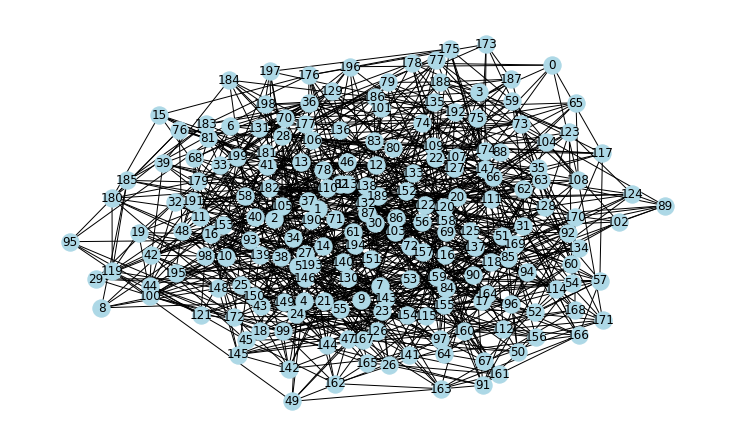

In [100]:
n_nodes = 200
av_degree = 20
k = int(av_degree/2)
p = 0.7 #probability of rewiring
G = nx.watts_strogatz_graph(n_nodes, k, p, seed=None)
print("Assortativity:", nx.degree_assortativity_coefficient(G))
pos=nx.spring_layout(G)
fig= plt.figure(figsize=(10,6))
nx.draw(G, pos=pos, node_color = 'lightblue', with_labels = True)
plt.show()

In [129]:
T = 25
log = Logistic(epsilon = 0.5, T = T, a = 4, n_nodes = n_nodes, tau_zero = 3, graph = G)

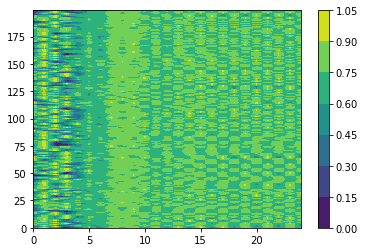

In [130]:
mapas = log.run()
individuais = []
numeros=[]
for j in range(len(mapas)):
    individuais.append(mapas[j])
    numeros.append(j)
#plotar os estados finais
# plt.plot(finais)
CS = plt.contourf(individuais)#,vmin=0, vmax=1, cmap = "inferno")
cbar = plt.colorbar(CS)

In [124]:
log.TESTE_cu()

0.11169422061452043